In [1]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

import DQN
import rl_utils

lr = 1e-2
num_episodes = 200
hidden_dim = 128
gamma = 0.98
epsilon = 0.01
target_update = 50
buffer_size = 5000
minimal_size = 1000
batch_size = 64
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device: {device}')

env_name = 'Pendulum-v1'
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = 11 # 将[-2, 2]之间的连续动作分为11个离散动作
random.seed(0)
np.random.seed(0)
# env.seed(0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
# 执行普通的DQN算法
agent = DQN.DQN(state_dim, hidden_dim, action_dim, lr, gamma, epsilon,
                target_update, device)
return_list, max_q_value_list = rl_utils.train_DQN(agent, env, num_episodes,
                                                   replay_buffer, minimal_size,
                                                   batch_size)



device: cuda


Iteration 0:   0%|          | 0/20 [00:00<?, ?it/s]/root/autodl-tmp/code/python/learn_dqn/DQN.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s, episode=200, return=-222.407]


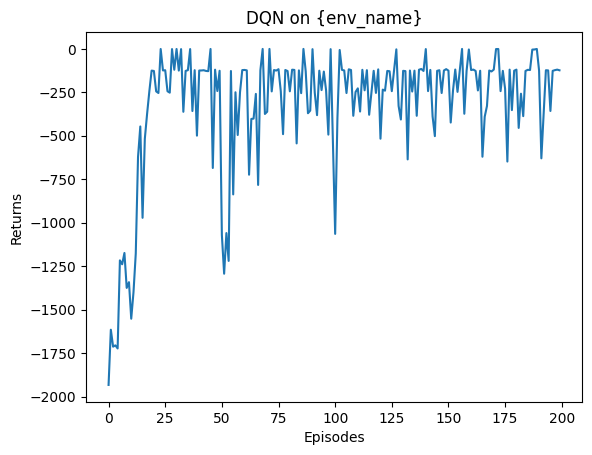

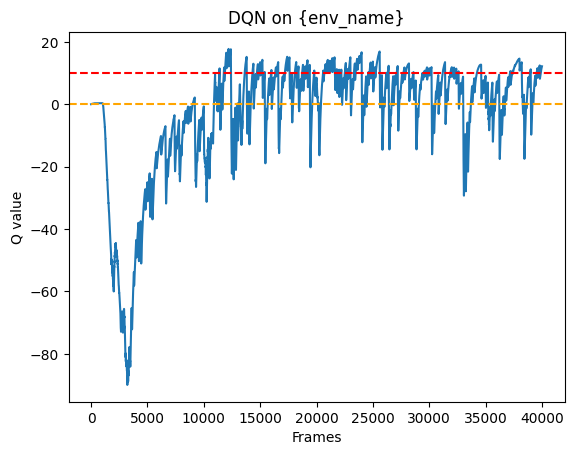

In [2]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('DQN on {env_name}')
plt.show()

frames_list = list(range(len(max_q_value_list)))
plt.plot(frames_list, max_q_value_list)
plt.axhline(0, c='orange', ls='--')
plt.axhline(10, c='red', ls='--')
plt.xlabel('Frames')
plt.ylabel('Q value')
plt.title('DQN on {env_name}')
plt.show()

In [3]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

import DQN
import rl_utils

lr = 1e-2
num_episodes = 200
hidden_dim = 128
gamma = 0.98
epsilon = 0.01
target_update = 50
buffer_size = 5000
minimal_size = 1000
batch_size = 64
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device: {device}')

env_name = 'Pendulum-v1'
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = 11 # 将[-2, 2]之间的连续动作分为11个离散动作
random.seed(0)
np.random.seed(0)
# env.seed(0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
# 执行普通的DQN算法
agent = DQN.DQN(state_dim, hidden_dim, action_dim, lr, gamma, epsilon,
                target_update, device, 'DoubleDQN')
return_list, max_q_value_list = rl_utils.train_DQN(agent, env, num_episodes,
                                                   replay_buffer, minimal_size,
                                                   batch_size)



device: cuda


Iteration 9: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s, episode=200, return=-201.038]


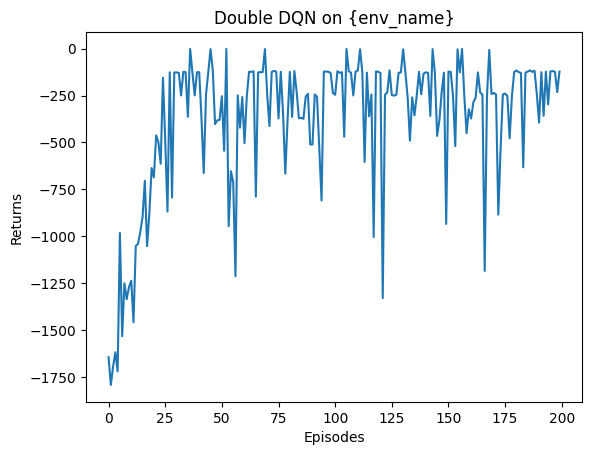

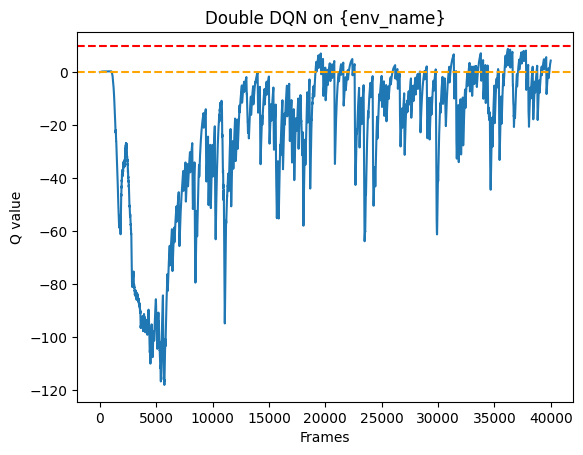

In [4]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Double DQN on {env_name}')
plt.show()

frames_list = list(range(len(max_q_value_list)))
plt.plot(frames_list, max_q_value_list)
plt.axhline(0, c='orange', ls='--')
plt.axhline(10, c='red', ls='--')
plt.xlabel('Frames')
plt.ylabel('Q value')
plt.title('Double DQN on {env_name}')
plt.show()